In [230]:
from __future__ import print_function

import os
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#import coremltools
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns


# watch gyro data

In [3]:
columns=['user','activity','time','x','y','z']
data_watch_gyro_sum = pd.DataFrame(data=None,columns=columns)
for dirname, _, filenames in os.walk('wisdm/wisdm-dataset/wisdm-dataset/raw/watch/gyro'):
    for filename in filenames:
        df = pd.read_csv('wisdm/wisdm-dataset/wisdm-dataset/raw/watch/gyro/'+filename , sep=",", header=None)
        temp=pd.DataFrame(data=df.values, columns=columns)
        data_watch_gyro_sum=pd.concat([data_watch_gyro_sum,temp])
print(data_watch_gyro_sum)

data_watch_gyro_sum['z'] = data_watch_gyro_sum['z'].str.replace(';','')
data_watch_gyro_sum['x']=data_watch_gyro_sum['x'].astype('float')
data_watch_gyro_sum['y']=data_watch_gyro_sum['y'].astype('float')
data_watch_gyro_sum['z']=data_watch_gyro_sum['z'].astype('float')

data_watch_gyro_sum['activity'].value_counts()
data_watch_gyro_sum.info()

       user activity             time         x         y             z
0      1639        A  182803804703000   0.36432 -0.879908     1.212271;
1      1639        A  182803845121000 -0.797883  1.950499  -0.39414784;
2      1639        A  182803885538000  0.335558   2.55983   -1.7896442;
3      1639        A  182803925089000  1.030111 -0.428236   -1.3283848;
4      1639        A  182803965213000 -2.098571  1.634116    -1.160073;
...     ...      ...              ...       ...       ...           ...
64874  1610        S   18917068249901  -0.50843  0.602261  0.061357632;
64875  1610        S   18917118178041  0.014615  0.945276  -0.16980475;
64876  1610        S   18917168106181  3.126252  1.933841  -0.83666027;
64877  1610        S   18917218034321  3.550228  2.166069    -1.326682;
64878  1610        S   18917267962461  4.390721  2.102153   -1.6675665;

[3440342 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 3440342 entries, 0 to 64878
Data columns (total 6 columns):
 # 

# phone gyro

In [292]:
data_phone_gyro_sum = pd.DataFrame(data=None,columns=columns)
for dirname, _, filenames in os.walk('wisdm/wisdm-dataset/wisdm-dataset/raw/phone/gyro'):
    for filename in filenames:
        df = pd.read_csv('wisdm/wisdm-dataset/wisdm-dataset/raw/phone/gyro/'+filename , sep=",", header=None)
        temp=pd.DataFrame(data=df.values, columns=columns)
        data_phone_gyro_sum=pd.concat([data_phone_gyro_sum,temp])

data_phone_gyro_sum['z'] = data_phone_gyro_sum['z'].str.replace(';','')

data_phone_gyro_sum['x']=data_phone_gyro_sum['x'].astype('float')
data_phone_gyro_sum['y']=data_phone_gyro_sum['y'].astype('float')
data_phone_gyro_sum['z']=data_phone_gyro_sum['z'].astype('float')

data_phone_gyro_sum['activity'].value_counts()
data_phone_gyro_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3608635 entries, 0 to 64251
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user      object 
 1   activity  object 
 2   time      object 
 3   x         float64
 4   y         float64
 5   z         float64
dtypes: float64(3), object(3)
memory usage: 192.7+ MB


# watch accelrometer data

In [16]:
data_watch_accel_sum = pd.DataFrame(data=None,columns=columns)
for dirname, _, filenames in os.walk('wisdm/wisdm-dataset/wisdm-dataset/raw/watch/accel'):
    for filename in filenames:
        df = pd.read_csv('wisdm/wisdm-dataset/wisdm-dataset/raw/watch/accel/'+filename , sep=",", header=None)
        temp=pd.DataFrame(data=df.values, columns=columns)
        data_watch_accel_sum=pd.concat([data_watch_accel_sum,temp])

print(data_watch_accel_sum)

data_watch_accel_sum['z'] = data_watch_accel_sum['z'].str.replace(';','')
data_watch_accel_sum['x']=data_watch_accel_sum['x'].astype('float')
data_watch_accel_sum['y']=data_watch_accel_sum['y'].astype('float')
data_watch_accel_sum['z']=data_watch_accel_sum['z'].astype('float')

data_watch_accel_sum['activity'].value_counts()
data_watch_accel_sum.info()

        user activity              time         x         y            z
0       1619        A   351205245071760  9.306112 -1.640178   -2.385074;
1       1619        A   351205294571760  8.958953 -1.609053  -2.3108535;
2       1619        A   351205344071760  8.044368 -0.943465   -2.282123;
3       1619        A   351205393571760   8.84882 -0.177321  -2.5981576;
4       1619        A   351205443071760  8.173655 -0.117466   -2.459294;
...      ...      ...               ...       ...       ...          ...
160794  1638        S  1135293554939000 -4.071533  -7.89159  -1.3747413;
160795  1638        S  1135293575112000 -3.877537 -7.846084  -1.4370118;
160796  1638        S  1135293595208000   -3.7027  -7.91554  -1.5687379;
160797  1638        S  1135293615414000 -3.578159 -8.176597  -1.8130299;
160798  1638        S  1135293635510000 -3.499124 -8.449629  -1.8968556;

[3710454 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 3710454 entries, 0 to 160798
Data columns (total 6 

In [ ]:
df_phone_watch = pd.DataFrame(data=None, columns=columns)
df_phone_watch['user']= data_watch_accel_sum['user'].head(3440342)
df_watch['activity']= data_watch_accel_sum['activity'].head(3440342)
df_watch['time']= data_watch_accel_sum['time'].head(3440342)
df_watch['x'] = data_watch_gyro_sum['x'].values + data_watch_accel_sum['x'].head(3440342).values
df_watch['y'] = data_watch_gyro_sum['x'].values + data_watch_accel_sum['y'].head(3440342).values
df_watch['z'] = data_watch_gyro_sum['x'].values + data_watch_accel_sum['z'].head(3440342).values

df_watch['activity'].value_counts()
df_watch

# phone accelrometer data

In [286]:
columns=['user','activity','time','x','y','z']

data_phone_accel_sum = pd.DataFrame(data=None,columns=columns)
for dirname, _, filenames in os.walk('wisdm/wisdm-dataset/wisdm-dataset/raw/phone/accel'):
    for filename in filenames:
        df = pd.read_csv('wisdm/wisdm-dataset/wisdm-dataset/raw/phone/accel/'+filename , sep=",", header=None)
        temp=pd.DataFrame(data=df.values, columns=columns)
        data_phone_accel_sum=pd.concat([data_phone_accel_sum,temp])

In [289]:
data_phone_accel_sum['z'] = data_phone_accel_sum['z'].str.replace(';','')
data_phone_accel_sum['activity'].value_counts()
data_phone_accel_sum['x']=data_phone_accel_sum['x'].astype('float')
data_phone_accel_sum['y']=data_phone_accel_sum['y'].astype('float')
data_phone_accel_sum['z']=data_phone_accel_sum['z'].astype('float')
data_phone_accel_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4804403 entries, 0 to 80869
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user      object 
 1   activity  object 
 2   time      object 
 3   x         float64
 4   y         float64
 5   z         float64
dtypes: float64(3), object(3)
memory usage: 256.6+ MB


# data combination

In [294]:
# combine phone accelerometer and gyroscope data
df_phone = pd.DataFrame(data=None, columns=columns)
df_phone['user']= data_phone_accel_sum['user'].head(3608635)
df_phone['activity']= data_phone_accel_sum['activity'].head(3608635)
df_phone['time']= data_phone_accel_sum['time'].head(3608635)
df_phone['x'] = data_phone_gyro_sum['x'].values + data_phone_accel_sum['x'].head(3608635).values
df_phone['y'] = data_phone_gyro_sum['y'].values + data_phone_accel_sum['y'].head(3608635).values
df_phone['z'] = data_phone_gyro_sum['z'].values + data_phone_accel_sum['z'].head(3608635).values

# combine watch and phone data
df_watch = pd.DataFrame(data=None, columns=columns)
df_watch['user']= data_watch_accel_sum['user'].head(3440342)
df_watch['activity']= data_watch_accel_sum['activity'].head(3440342)
df_watch['time']= data_watch_accel_sum['time'].head(3440342)
df_watch['x'] = data_watch_gyro_sum['x'].values + data_watch_accel_sum['x'].head(3440342).values
df_watch['y'] = data_watch_gyro_sum['x'].values + data_watch_accel_sum['y'].head(3440342).values
df_watch['z'] = data_watch_gyro_sum['x'].values + data_watch_accel_sum['z'].head(3440342).values

# combine phone and watch data

df_phone_watch = pd.DataFrame(data=None, columns=columns)
df_phone_watch['user']= df_phone['user'].head(3440342)
df_phone_watch['activity']= df_phone['activity'].head(3440342)
df_phone_watch['time']= df_phone['time'].head(3440342)
df_phone_watch['x'] = df_watch['x'].values + df_phone['x'].head(3440342).values
df_phone_watch['y'] = df_watch['y'].values + df_phone['y'].head(3440342).values
df_phone_watch['z'] = df_watch['z'].values + df_phone['z'].head(3440342).values

In [295]:
# change H, I, J to H
df_watch['activity'] = df_watch['activity'].replace(['H', 'I', 'J', 'L'], 'H')
df_watch['activity']

0        A
1        A
2        A
3        A
4        A
        ..
17033    G
17034    G
17035    G
17036    G
17037    G
Name: activity, Length: 3440342, dtype: object

In [296]:
Fs = 20

# df_watch = df_watch.drop(['user', 'time'], axis=1)

df_a = df_phone_watch[df_phone_watch['activity']=='A'].head(174604)
df_k = df_phone_watch[df_phone_watch['activity']=='K'].head(174604)
df_e = df_phone_watch[df_phone_watch['activity']=='E'].head(174604)
df_d = df_phone_watch[df_phone_watch['activity']=='D'].head(174604)
df_h = df_phone_watch[df_phone_watch['activity']=='H'].head(174604)
df_f = df_phone_watch[df_phone_watch['activity']=='F'].head(174604)

# balanced_data = pd.concat([df_a,df_m,df_k,df_p,df_e,df_o,df_c,df_d,df_l,df_b,df_h,df_f,df_g,df_q,df_r,df_s,df_i,df_j])

# walking, sitting, standing, typing, eating, drinking from a cup
balanced_data = pd.concat([df_a,df_d,df_e,df_f,df_h,df_k])

balanced_data['activity'].value_counts()
balanced_data

,user,activity,time,x,y,z
0,1631,A,1553872620859145,6.418503,-0.319990,-0.820251
1,1631,A,1553872671213149,1.897995,0.260517,1.248988
2,1631,A,1553872721567153,3.882475,8.674672,4.740116
3,1631,A,1553872771921157,8.737418,18.673672,6.291784
4,1631,A,1553872822275160,0.361378,7.068919,2.413328
...,...,...,...,...,...,...
80864,1635,K,678056837857840,1.672455,-9.318509,-3.728840
80865,1635,K,678056857999441,1.595450,-9.392568,-3.731182
80866,1635,K,678056878141043,1.693974,-9.052802,-3.744604
80867,1635,K,678056898282644,1.760324,-9.303151,-3.881280


In [297]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity']) 

from sklearn.preprocessing import StandardScaler

x = balanced_data[['x','y','z']]
y = balanced_data['label']
scaler = StandardScaler()
x = scaler.fit_transform(x)

scaled_x = pd.DataFrame(data=x, columns=['x','y','z'])
scaled_x['label'] = y.values

scaled_x

,x,y,z,label
0,0.656762,0.537032,-0.360908,0
1,0.100820,0.599750,-0.104312,0
2,0.344876,1.508825,0.328606,0
3,0.941948,2.589128,0.521020,0
4,-0.088156,1.335338,0.040072,0
...,...,...,...,...
1042429,0.073083,-0.435179,-0.721587,5
1042430,0.063613,-0.443180,-0.721878,5
1042431,0.075729,-0.406471,-0.723542,5
1042432,0.083889,-0.433519,-0.740491,5


# Splitting Data for Machine Learning

In [299]:
from sklearn.model_selection import train_test_split

x_columns = scaled_x.iloc[:, 0:3]
y_columns = scaled_x.iloc[:, 3:4]

# sklearn split
trainx, testx, trainy, testy = train_test_split(x_columns, y_columns, test_size=0.3, shuffle=True)

# dont use sklearn split
# test_size = 0.2
# np.random.seed(42)
# indices = np.random.permutation(x_columns.shape[0])

# num_test_samples = int(test_size * x_columns.shape[0])

# test_indices = indices[:num_test_samples]
# train_indices = indices[num_test_samples:]

# trainx = x_columns[train_indices]
# trainy = y_columns[train_indices]
# testx = x_columns[test_indices]
# testy = y_columns[test_indices]

assert(len(trainx) == len(trainy))

# Sequencing Data for Temporal Analysis

In [300]:
from scipy.stats import mode

WINDOW_LENGTH = 100
STRIDE_LENGTH = 3
# NUM_CLASSES = 18
NUM_CLASSES = 6
NUM_FEATURES = 3

def sequence_generator(x, y, length, stride):
    seq_x = []
    seq_y = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        target_sequence = y.iloc[i : i + length]
        target_mode = mode(target_sequence.values)[0][0]
        seq_x.append(input_sequence)
        seq_y.append(target_mode)
    return np.array(seq_x), np.array(seq_y)

tx, ty = sequence_generator(trainx, trainy, WINDOW_LENGTH, STRIDE_LENGTH)
vx, vy = sequence_generator(testx, testy, WINDOW_LENGTH, STRIDE_LENGTH)

print(tx[:10], ty[:10])

[[[-1.05147043 -0.471967    1.15794315]
  [ 1.13917797 -0.62486472  0.41156093]
  [ 0.20836606  0.78946936 -1.8260234 ]
  ...
  [ 0.84140207 -0.29354095 -0.09083322]
  [-1.08376309 -0.04740406 -1.21849575]
  [ 0.09055826 -0.50318748 -0.80106937]]

 [[-1.19830981  0.56429075  1.22015087]
  [-0.98487969  1.5771408  -0.86690908]
  [ 1.18710315  0.89561097  1.1018462 ]
  ...
  [ 0.17785293 -1.1999606  -0.32494475]
  [ 1.58344703 -1.26458003 -0.60146498]
  [-1.39481518 -0.4958793   0.54606317]]

 [[-1.45159178 -0.56179482 -0.39878068]
  [-0.2573396   1.00359182  0.7064311 ]
  [-0.1890276  -0.87086099 -1.51831736]
  ...
  [-2.26444776  0.36327787  0.70030733]
  [-0.11501482  0.1394878  -0.27953678]
  [-0.46304203  0.06723862 -2.04628318]]

 ...

 [[ 0.97047202 -0.67746811 -1.47560621]
  [ 0.95962074 -0.75558768  0.28995881]
  [-0.21714494  0.83028405  1.34560515]
  ...
  [ 0.99354943 -0.75520925 -0.15664433]
  [-1.22177624  1.38680368 -1.12532622]
  [-0.61708374  1.78720761 -0.00843676]]

 [

# one-hot encoding

In [301]:
from keras.utils import to_categorical

tty = to_categorical(ty, num_classes=NUM_CLASSES)
vvy = to_categorical(vy, num_classes=NUM_CLASSES)

# Defining LSTM-based Deep Learning Model

In [302]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Flatten
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau


model = Sequential()
model.add(Input((WINDOW_LENGTH, NUM_FEATURES)))
model.add(LSTM(128, input_shape=(NUM_FEATURES, NUM_FEATURES), return_sequences=False))
# model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))
# model.add(LSTM(64, return_sequences=False))
# model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/Users/zehaokou/miniconda3/envs/llama/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                  │ (None, 128)            │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,870 (331.52 KB)

 Trainable params: 84,870 (331.52 KB)

 Non-trainable params: 0 (0.00 B)

In [303]:
EPOCHS_SIZE = 100
BATCH_SIZE = 1024
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001, verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=True)
# model.fit(tx, tty, validation_split=0.2, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, callbacks=[early_stopping])

history = model.fit(tx, tty, validation_split=0.2, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, callbacks=[reduce_lr])

Epoch 1/100
112/191 ━━━━━━━━━━━━━━━━━━━━ 28s 364ms/step - accuracy: 0.1985 - loss: 2.5729

KeyboardInterrupt: 

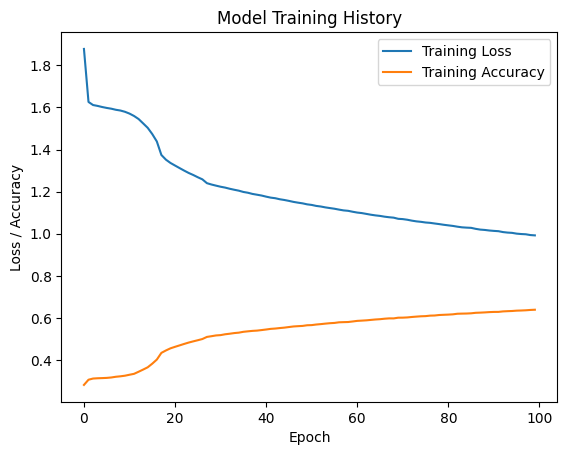

In [281]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Training History')
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [282]:
model.evaluate(vx, vvy, batch_size=BATCH_SIZE)

69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - accuracy: 0.2571 - loss: 2.2965


[2.252582311630249, 0.26434987783432007]

In [283]:
# model.evaluate(vx, vvy, batch_size=BATCH_SIZE)
from keras.callbacks import Callback
import matplotlib.pyplot as plt

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_loss = []
        self.test_acc = []

    def on_epoch_end(self, epoch, logs=None):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        self.test_loss.append(loss)
        self.test_acc.append(acc)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

# Usage
test_data = (vx, vvy)
test_callback = TestCallback(test_data=test_data)

history = model.fit(tx, tty, validation_split=0.2, epochs=10, batch_size=BATCH_SIZE, callbacks=[test_callback])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(test_callback.test_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(test_callback.test_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
plt.show()

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.6418 - loss: 0.9843

KeyboardInterrupt: 

# train and test (pytorch)

In [304]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold, train_test_split
import torchvision
from torchvision import models
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        lstm_layers = []
        for i in range(num_layers):
            lstm_layers.append(nn.LSTM(input_dim if i == 0 else hidden_dim, hidden_dim, num_layers=1, batch_first=True, dropout=0.1 if i < num_layers - 1 else 0))
        self.lstm = nn.ModuleList(lstm_layers)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(hidden_dim * WINDOW_LENGTH, 128) 
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        for lstm_layer in self.lstm:
            x, _ = lstm_layer(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

import torch
import torch.nn as nn

class CNNLSTMModel(nn.Module):
    def __init__(self, num_features, num_classes):
        super(CNNLSTMModel, self).__init__()
        self.num_features = num_features  # e.g., 3 for accelerometer XYZ axes
        self.num_classes = num_classes

        # Convolutional layers
        self.conv1 = nn.Conv1d(in_channels=num_features, out_channels=64, kernel_size=5, padding=2)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, padding=2)
        self.pool = nn.MaxPool1d(2)
        self.relu = nn.ReLU()

        # LSTM layer
        self.lstm = nn.LSTM(input_size=128, hidden_size=100, num_layers=1, batch_first=True)

        # Output layer
        self.fc = nn.Linear(100, num_classes)

    def forward(self, x):
        # x shape: (batch, time_steps, num_features)
        # Permute to fit Conv1d input requirement: (batch, channels, time_steps)
        x = x.permute(0, 2, 1)

        # Conv layers
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        # Prepare for LSTM
        x = x.permute(0, 2, 1)  # Change back to (batch, time_steps, features)

        # LSTM layer
        x, (hn, cn) = self.lstm(x)

        # Take the last hidden state
        x = hn[-1]

        # Fully connected layer
        x = self.fc(x)
        return x

WINDOW_LENGTH = 100
NUM_FEATURES = 3
NUM_CLASSES = 7

net = LSTMModel(NUM_FEATURES, 7, 1, NUM_CLASSES)
# net = CNNLSTMModel(num_features=NUM_FEATURES, num_classes=NUM_CLASSES)

# Convert arrays to PyTorch tensors
x_train_tensor = torch.tensor(tx, dtype=torch.float32)
y_train_tensor = torch.tensor(tty, dtype=torch.long)  # Assuming y_train is already categorical
x_test_tensor = torch.tensor(vx, dtype=torch.float32)
y_test_tensor = torch.tensor(vvy, dtype=torch.long)

# Create datasets and loaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

device = torch.device("mps")
net.to(device)  

LSTMModel(
  (lstm): ModuleList(
    (0): LSTM(3, 7, batch_first=True)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=700, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=7, bias=True)
)

In [305]:
criterion = nn.CrossEntropyLoss()
train_accuracies = []
print("Start Training...")

patience = 10  
n_folds = 5 
num_epochs = 100

kfold = KFold(n_splits=n_folds, shuffle=True)
early_stop_counter = 0
best_loss = float('inf')

for fold, (train_ids, val_ids) in enumerate(kfold.split(train_loader.dataset)):
    print(f"FOLD {fold + 1}/{n_folds}")

    # optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01, weight_decay=1e-4)
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_ids)

    trainloader_fold = torch.utils.data.DataLoader(train_loader.dataset, batch_size=1024, sampler=train_subsampler)
    valloader_fold = torch.utils.data.DataLoader(train_loader.dataset, batch_size=1024, sampler=val_subsampler)

    for epoch in range(num_epochs):
        print('-' * 30, '\n', 'epoch', epoch)
        net.train()
        loss100 = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(trainloader_fold):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            if labels.dim() > 1:  # This checks if labels are not 1D
                labels = torch.argmax(labels, dim=1)
            loss = criterion(outputs, labels.to(device))
            loss.backward()
            optimizer.step()

            loss100 += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Validation
        net.eval()
        val_loss = 0.0
        with torch.no_grad():
            for i, data in enumerate(valloader_fold):
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = net(inputs)
                if labels.dim() > 1:  # This checks if labels are not 1D
                    labels = torch.argmax(labels, dim=1)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(valloader_fold)
        print(f"Validation Loss: {avg_val_loss:.4f}")

        # Check for early stopping
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1

        if early_stop_counter >= patience:
            print("Early stopping!")
            break

plt.plot(train_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()
print("done")

Start Training...
FOLD 1/5
------------------------------ 
 epoch 0
Validation Loss: 1.8597
------------------------------ 
 epoch 1
Validation Loss: 1.8120
------------------------------ 
 epoch 2
Validation Loss: 1.7885
------------------------------ 
 epoch 3
Validation Loss: 1.7733
------------------------------ 
 epoch 4
Validation Loss: 1.7525
------------------------------ 
 epoch 5
Validation Loss: 1.7536
------------------------------ 
 epoch 6
Validation Loss: 1.8255
------------------------------ 
 epoch 7
Validation Loss: 1.7900
------------------------------ 
 epoch 8
Validation Loss: 1.7761
------------------------------ 
 epoch 9
Validation Loss: 1.7630
------------------------------ 
 epoch 10
Validation Loss: 1.7845
------------------------------ 
 epoch 11
Validation Loss: 1.7610
------------------------------ 
 epoch 12
Validation Loss: 1.7584
------------------------------ 
 epoch 13
Validation Loss: 1.7510
------------------------------ 
 epoch 14
Validation Loss: 

Start Testing...
Test Loss: 1.9422, Test Accuracy: 16.99%


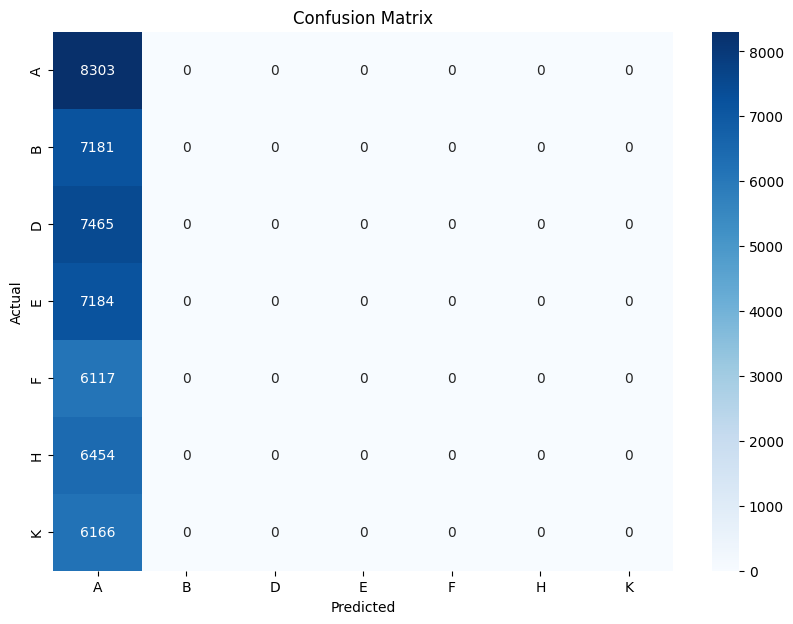

In [272]:
print("Start Testing...")

test_loss = 0.0
correct = 0
total = 0
all_preds = []
all_labels = []

net.eval()

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        if labels.dim() > 1:  # Check if labels are not 1D, useful for one-hot encoded labels
            labels = torch.argmax(labels, dim=1)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy()) 

avg_test_loss = test_loss / len(test_loader)
test_accuracy = correct / total * 100
print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

cm = confusion_matrix(all_labels, all_preds)

class_names = ['A', 'B', 'D', 'E','F', 'H', 'K']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [217]:
test_loss, test_accuracy = test_model(net, test_loader, criterion, device)

Test Loss: 5.5161, Accuracy: 0.1517


In [59]:
def train_model(num_epochs, model, train_loader, criterion, optimizer):
    model.train()  # Set the model to training mode.
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            
            outputs = model(inputs)

            # Correct the shape of labels if necessary
            if labels.dim() > 1:  # This checks if labels are not 1D
                labels = torch.argmax(labels, dim=1)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Check label data type right before the loss calculation
print("Labels data type before loss calculation:", labels.dtype)

print("Outputs shape:", outputs.shape)  # Should be [batch_size, num_classes]
print("Outputs type:", outputs.dtype)   # Should be torch.float32
print("Labels shape:", labels.shape)   # Should be [batch_size]
print("Labels type:", labels.dtype)    # Should be torch.long

train_model(10, net, train_loader, criterion, optimizer)

Labels data type before loss calculation: torch.int64
Outputs shape: torch.Size([1024, 18])
Outputs type: torch.float32
Labels shape: torch.Size([1024, 18])
Labels type: torch.int64
Epoch [1/10], Loss: 2.0093
Epoch [2/10], Loss: 1.6457
Epoch [3/10], Loss: 1.1824
Epoch [4/10], Loss: 0.7026
Epoch [5/10], Loss: 0.9689
Epoch [6/10], Loss: 0.6267
Epoch [7/10], Loss: 0.9258
Epoch [8/10], Loss: 0.8332
Epoch [9/10], Loss: 0.5801
Epoch [10/10], Loss: 0.5268


In [64]:
def evaluate_model(net, test_loader):
    net.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f'Accuracy: {100 * correct / total:.2f}%')

evaluate_model(net, test_loader)

RuntimeError: Input and parameter tensors are not at the same device, found input tensor at cpu and parameter tensor at mps:0

# cross-validation

In [158]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import EarlyStopping

EPOCHS_SIZE = 100
BATCH_SIZE = 512

NUM_SPLITS = 5

skf = StratifiedKFold(n_splits = NUM_SPLITS, shuffle=False)
lst_accu_stratified = []

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=10, verbose=1, restore_best_weights=True)

for train_index, test_index in skf.split(x_columns, y_columns):
    x_train_fold, x_test_fold = x_columns.iloc[train_index], x_columns.iloc[test_index]
    y_train_fold, y_test_fold = y_columns.iloc[train_index], y_columns.iloc[test_index]
    
    tx, ty = sequence_generator(x_train_fold, y_train_fold, WINDOW_LENGTH, STRIDE_LENGTH)
    vx, vy = sequence_generator(x_test_fold, y_test_fold, WINDOW_LENGTH, STRIDE_LENGTH)


    tty = to_categorical(ty, num_classes = NUM_CLASSES)
    vvy = to_categorical(vy, num_classes = NUM_CLASSES)

    model.fit(tx, tty, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, callbacks=[early_stopping])
    
    test_loss, test_accuracy = model.evaluate(vx, vvy)
    lst_accu_stratified.append(test_accuracy)

Epoch 1/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.3948 - loss: 1.9136
Epoch 2/100
 13/983 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.4922 - loss: 1.3578

/Users/zehaokou/miniconda3/envs/llama/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


983/983 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.5099 - loss: 1.3232
Epoch 3/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.5365 - loss: 1.2650
Epoch 4/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5671 - loss: 1.2087
Epoch 5/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5861 - loss: 1.1614
Epoch 6/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5945 - loss: 1.1317
Epoch 7/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.6001 - loss: 1.1124
Epoch 8/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.6051 - loss: 1.0970
Epoch 9/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.6115 - loss: 1.0808
Epoch 10/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.6133 - loss: 1.0716
Epoch 11/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.6170 - loss: 1.0655
Epoch 12/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.6209 - loss: 1.0543
Epoch 13/100
983/983 ━━━━━━━━━

KeyboardInterrupt: 

In [172]:
from statistics import stdev, mean

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified))
print('\nMinimum Accuracy:', min(lst_accu_stratified))
print('\nOverall Accuracy:', mean(lst_accu_stratified))
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.6346001029014587]

Maximum Accuracy That can be obtained from this model is: 0.6346001029014587

Minimum Accuracy: 0.6346001029014587

Overall Accuracy: 0.6346001029014587


StatisticsError: variance requires at least two data points